In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [4]:
PATH =  "ashrae-energy-prediction/"
#train_df = pd.read_pickle(PATH + "train.pkl")

In [3]:
train_df.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
month                        0
year                         0
dtype: int64

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 18 columns):
building_id           int64
meter                 int64
timestamp             datetime64[ns]
meter_reading         float64
site_id               int64
primary_use           object
square_feet           int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
month                 int64
year                  int64
dtypes: datetime64[ns](1), float64(10), int64(6), object(1)
memory usage: 2.9+ GB


In [5]:
train_df.isnull().sum()/len(train_df)

building_id           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
primary_use           0.000000
square_feet           0.000000
year_built            0.599900
floor_count           0.826528
air_temperature       0.004781
cloud_coverage        0.436551
dew_temperature       0.004953
precip_depth_1_hr     0.185447
sea_level_pressure    0.060925
wind_direction        0.071678
wind_speed            0.007107
month                 0.000000
year                  0.000000
dtype: float64

In [6]:
# fill np.nan by mean value

In [12]:
year_built_mean = train_df.year_built.mean()

In [13]:
train_df.year_built.fillna(year_built_mean,inplace = True)

In [15]:
train_df.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built                   0
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
month                        0
year                         0
dtype: int64

In [43]:
train_df.drop("timestamp",axis = 1,inplace = True)
train_df["age"] = train_df["year"] - train_df["year_built"]

In [44]:
train_df.head()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,age
0,0,0,0.0,0,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,8.0
1,1,0,0.0,0,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,12.0
2,2,0,0.0,0,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,25.0
3,3,0,0.0,0,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,14.0
4,4,0,0.0,0,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,41.0


In [7]:
floor_count_mean = train_df.floor_count.mean()

In [8]:
train_df.floor_count.fillna(floor_count_mean,inplace = True)

In [9]:
year_built_mean = train_df.year_built.mean()
floor_count_mean = train_df.floor_count.mean()
air_temperature =train_df.air_temperature.mean() 
cloud_coverage = train_df.cloud_coverage.mean()
dew_temperature = train_df.dew_temperature.mean()
precip_depth_1_hr_mean = train_df.precip_depth_1_hr_mean
train_df.year_built.fillna(year_built_mean,inplace = True)
train_df.floor_count.fillna(floor_count_mean,inplace = True)
train_df.fillna({"air_temperature":air_temperature,"cloud_coverage":cloud_coverage,"dew_temperature":dew_temperature},inplace = True)
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,4.184848,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,4.184848,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,4.184848,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,4.184848,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,4.184848,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016


In [18]:
train_df.isnull().sum().index

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'month', 'year'],
      dtype='object')

In [10]:
def get_mean_dict(train_df):
    fill_mean_arr = []
    null_sum = train_df.isnull().sum()
    for i in range(len(null_sum)):
        if null_sum.iloc[i] != 0:
            column = train_df.columns[i]
            mean = train_df[column].mean()
            mean_dict = {
                column : mean
            }
            fill_mean_arr.append(mean_dict)
        else:
            pass
    return fill_mean_arr
    

In [35]:
null_mean_dict  =get_mean_dict(train_df)

In [36]:
for i in null_mean_dict:
    train_df.fillna(i,inplace = True)

In [ ]:
from sklearn.model_selection import StatifiedKFold
kf = StatifiedKFold(n_split= 5,random_state = 1)


In [37]:
train_df.isnull().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
month                 0
year                  0
dtype: int64

In [38]:
train_df.drop("primary_use",inplace = True,axis = 1)

In [40]:
train_df.drop("primary_use",inplace = True,axis = 1)
train_df.drop("timestamp",inplace = True,axis = 1)
train_df.drop(["year_built","year"],inplace = True ,axis = 1)

In [46]:
train_df.drop(["year_built","year"],inplace = True ,axis = 1)

In [47]:
train_df.head()

,building_id,meter,meter_reading,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,age
0,0,0,0.0,0,7432,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,8.0
1,1,0,0.0,0,2720,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,12.0
2,2,0,0.0,0,5376,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,25.0
3,3,0,0.0,0,23685,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,14.0
4,4,0,0.0,0,116607,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,41.0


In [48]:
train_target = train_df.meter_reading

In [49]:
from sklearn.model_selection import train_test_split
X_train ,X_test = train_test_split(train_df,test_size = 0.4,random_state = 1)
y_train,y_test = train_test_split(train_target,test_size = 0.4,random_state = 1)

# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)
params = {
    'objective': 'regression',
    "task":"train",
    "n_estimators":370,
    "learning_rate":0.05
    #"num_leaves":num_leaves
    }
gbm = lgb.train(
        params,
        train_data,
        valid_sets=eval_data,
        num_boost_round=100,
        verbose_eval=5
   )

/home/yada_yuki_entertainment/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's l2: 1.43753e+10
[10]	valid_0's l2: 9.32756e+09
[15]	valid_0's l2: 6.30381e+09
[20]	valid_0's l2: 4.49167e+09
[25]	valid_0's l2: 3.40009e+09
[30]	valid_0's l2: 2.73591e+09
[35]	valid_0's l2: 2.31206e+09
[40]	valid_0's l2: 2.05013e+09
[45]	valid_0's l2: 1.88485e+09
[50]	valid_0's l2: 1.78469e+09
[55]	valid_0's l2: 1.72091e+09
[60]	valid_0's l2: 1.67559e+09
[65]	valid_0's l2: 1.62881e+09
[70]	valid_0's l2: 1.59479e+09
[75]	valid_0's l2: 1.56749e+09
[80]	valid_0's l2: 1.54672e+09
[85]	valid_0's l2: 1.53582e+09
[90]	valid_0's l2: 1.52037e+09
[95]	valid_0's l2: 1.50302e+09
[100]	valid_0's l2: 1.49342e+09
[105]	valid_0's l2: 1.48061e+09
[110]	valid_0's l2: 1.47559e+09
[115]	valid_0's l2: 1.46448e+09
[120]	valid_0's l2: 1.46234e+09
[125]	valid_0's l2: 1.46063e+09
[130]	valid_0's l2: 1.4549e+09
[135]	valid_0's l2: 1.45302e+09
[140]	valid_0's l2: 1.45184e+09
[145]	valid_0's l2: 1.44809e+09
[150]	valid_0's l2: 1.4462e+09
[155]	valid_0's l2: 1.44445e+09
[160]	valid_0's l2: 1.44251e+0

In [1]:
%%javascript
var notebook_name = document.body.attributes['data-notebook-name'].value
IPython.notebook.kernel.execute(`NOTEBOOK_NAME = '${notebook_name}'`);

<IPython.core.display.Javascript object>

In [52]:
def generate_submission(id_name,test_id,target_name,prediction,NOTEBOOK_NAME,add_word = ""):
    from datetime import datetime
    submission_data = pd.DataFrame({id_name: test_id, target_name: predictions})
    submission_file = 'sub_'+ NOTEBOOK_NAME+ '_' + str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')) + '_'+add_word+'.csv'
    submission_data.to_csv(submission_file, index=False)
    print("file_name = " , submission_file)
    print(submission_data.head())

In [53]:
import pickle
from datetime import datetime
with open(NOTEBOOK_NAME + '_model.pickle', mode='wb') as fp:
    pickle.dump(gbm, fp)

In [1]:
import pickle
with open( "2019-10-20_02-13-04.pickle", mode='rb') as fp:
    gbm= pickle.load(fp)

In [5]:
test_df = pd.read_pickle(PATH  + "test.pkl")

In [7]:
import kaggle
null_mean_dict_test  = kaggle.get_mean_dict(test_df)
null_mean_dict_test

KeyboardInterrupt: 

In [ ]:
for i in null_mean_dict_test:
    test_df.fillna(i,inplace = True)
test_df.drop("primary_use",inplace = True,axis = 1)
test_df.drop("timestamp",axis = 1,inplace = True)
test_df["age"] = test_df["year"] - test_df["year_built"]
test_df.drop(["year_built","year"],inplace = True ,axis = 1)

In [63]:
train_df.shape

(20216100, 15)

In [ ]:
y_predict = gbm.predict(test_df)

In [13]:
test_df.columns

Index(['building_id', 'meter', 'timestamp', 'site_id', 'primary_use',
       'square_feet', 'year_built', 'floor_count', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed', 'month', 'year'],
      dtype='object')

In [14]:
gbm.feature_importance()

array([1721,   50,  726,    0,  648,   22, 1461,  258, 1279,  249, 1854,
       1076,  829,  914,   13], dtype=int32)

17
15


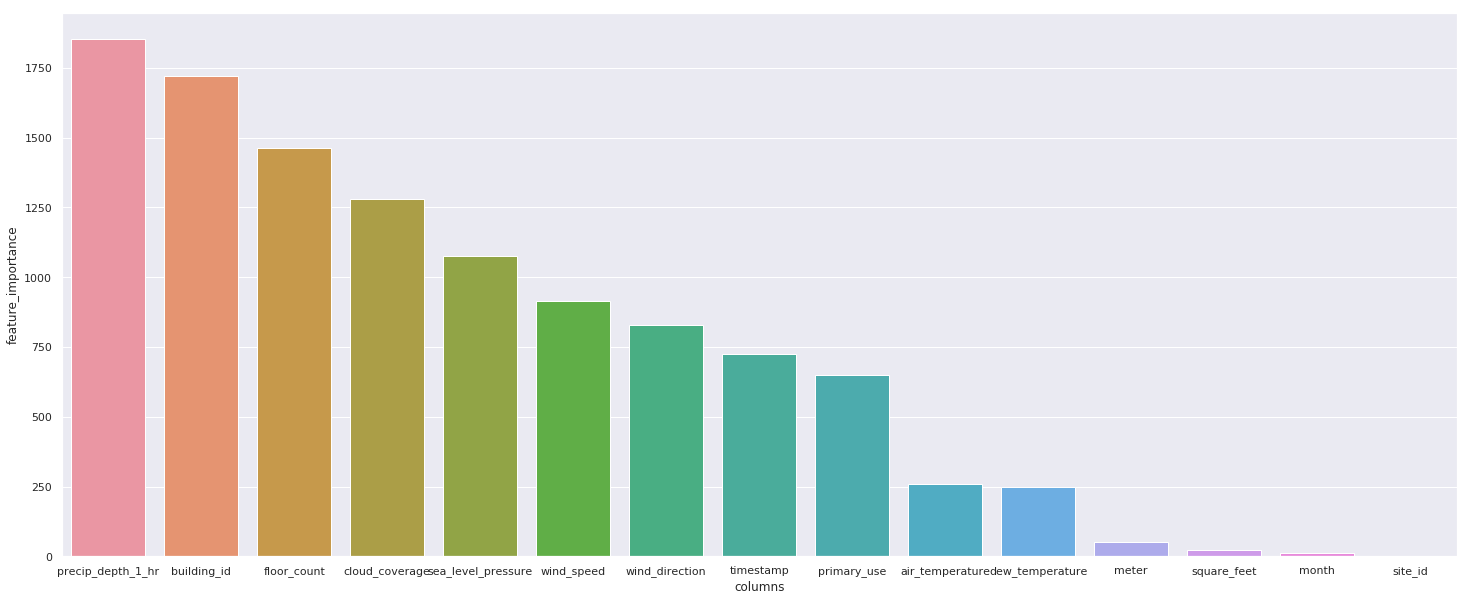

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
print(len(test_df.columns))
print(len(gbm.feature_importance()))
feature_importance_df = pd.DataFrame({
    "columns":test_df.drop(["year_built","year"],axis = 1).columns,
    "feature_importance":gbm.feature_importance()
})
sns.set()
sns.set_context("notebook")
plt.figure(figsize=(25, 10))
sns.barplot(y="feature_importance", x="columns",data=feature_importance_df.sort_values('feature_importance',ascending=False))

In [18]:
def generate_submission(id_name,test_id,target_name,prediction,NOTEBOOK_NAME,add_word = ""):
    from datetime import datetime
    submission_data = pd.DataFrame({id_name: test_id, target_name: prediction})
    submission_file = 'sub_'+ NOTEBOOK_NAME+ '_' + str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')) + '_'+add_word+'.csv'
    submission_data.to_csv(submission_file, index=False)
    print("file_name = " , submission_file)
    print(submission_data.head())


In [19]:
generate_submission("row_id",test_df.index,"meter_reading",y_predict,NOTEBOOK_NAME,add_word = "First")

file_name =  sub_0_lgbm.ipynb_2019-10-20_02-42-40_First.csv
   row_id  meter_reading
0       0      15.771294
1       1      15.771294
2       2      15.771294
3       3      15.771294
4       4      15.771294
